In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [117]:
df = pd.read_csv('auto_mpg_dataset.csv')
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64
 2   Displacement  398 non-null    object 
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    int64  
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [19]:
type(df['Displacement'].iloc[0])

str

In [118]:
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64
 2   Displacement  392 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    int64  
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [13]:
df['Model Year'].value_counts().sort_index()

Model Year
1    249
2     70
3     79
Name: count, dtype: int64

In [17]:
# 값 변경: 1 → 0, 2 or 3 → 1
df['Model Year'] = df['Model Year'].replace({1: 0, 2: 1, 3: 1})
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,0,chevrolet chevelle malibu
1,8,350.0,165.0,3693.0,11.5,70,0,buick skylark 320
2,8,318.0,150.0,3436.0,11.0,70,0,plymouth satellite
3,8,304.0,150.0,3433.0,12.0,70,0,amc rebel sst
4,8,302.0,140.0,3449.0,10.5,70,0,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,0,ford mustang gl
394,4,97.0,52.0,2130.0,24.6,82,1,vw pickup
395,4,135.0,84.0,2295.0,11.6,82,0,dodge rampage
396,4,120.0,79.0,2625.0,18.6,82,0,ford ranger


In [8]:
model_year_counts = df.groupby('Origin')['Model Year'].nunique()
model_year_counts

Origin
amc ambassador brougham    1
amc ambassador dpl         1
amc ambassador sst         1
amc concord                1
amc concord d/l            1
                          ..
vw dasher (diesel)         1
vw pickup                  1
vw rabbit                  1
vw rabbit c (diesel)       1
vw rabbit custom           1
Name: Model Year, Length: 305, dtype: int64

In [9]:
model_year_counts.unique()

array([1], dtype=int64)

In [25]:
print(df['Acceleration'].describe())

dff = df.drop(labels=['Origin','Model Year'], axis=1)
corr = dff.corr('pearson')
corr

count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: Acceleration, dtype: float64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
MPG,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
Cylinders,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
Displacement,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Horsepower,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
Weight,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
Acceleration,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


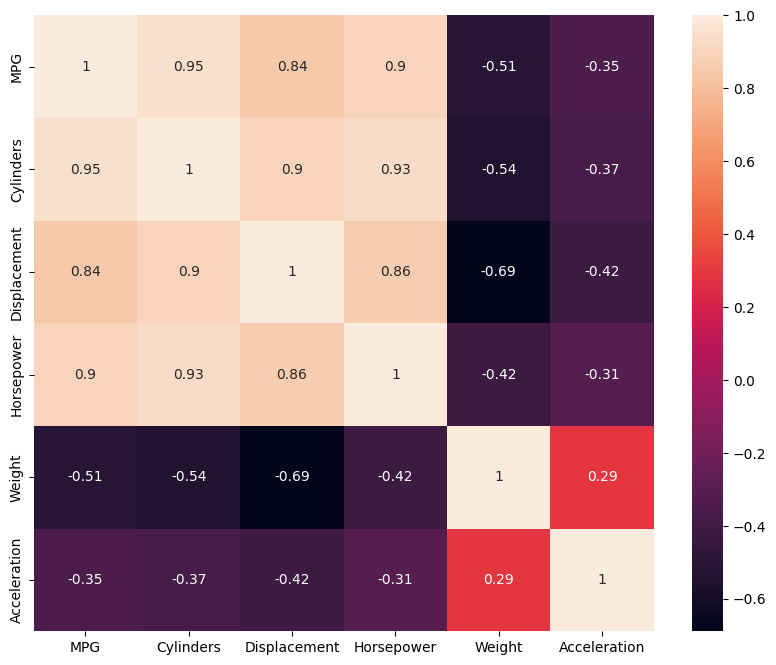

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
ax = sns.heatmap(corr, annot=True)

In [29]:
## 양의 상관관계 최대값 추출
res = []
for i in corr.columns:
    li = corr[i].drop(i).sort_values()
    var, val = li.idxmax(), li.max()
    res.append({'Var': i, 'Max_Corr': var, 'Corr': val})

## 독립 변수 상관관계 중복 제거
final = pd.DataFrame(res).sort_values(by='Corr', ascending=False).reset_index(drop=True)
final['Pair'] = final.apply(lambda row: tuple(sorted([row['Var'], row['Max_Corr']])), axis=1)
final_unique = final.drop_duplicates(subset=['Pair']).drop('Pair', axis=1)

final_unique

,Var,Max_Corr,Corr
0,MPG,Cylinders,0.950721
2,Horsepower,Cylinders,0.932824
3,Displacement,Cylinders,0.897257
4,Weight,Acceleration,0.288137


In [119]:
df = df.drop(labels=['Cylinders'], axis=1)
df

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,8,165.0,3693.0,11.5,70,1,buick skylark 320
2,8,150.0,3436.0,11.0,70,1,plymouth satellite
3,8,150.0,3433.0,12.0,70,1,amc rebel sst
4,8,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...
393,4,86.0,2790.0,15.6,82,1,ford mustang gl
394,4,52.0,2130.0,24.6,82,2,vw pickup
395,4,84.0,2295.0,11.6,82,1,dodge rampage
396,4,79.0,2625.0,18.6,82,1,ford ranger


In [120]:
pred_disp = df[df['Displacement'].isna()]
pred_disp

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,4,NaN,2046.0,19.0,71,1,ford pinto
126,6,NaN,2875.0,17.0,74,1,ford maverick
330,4,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,4,NaN,2905.0,14.3,80,1,ford mustang cobra
354,4,NaN,2320.0,15.8,81,2,renault 18i
374,4,NaN,3035.0,20.5,82,1,amc concord dl


In [121]:
df = df.dropna(subset='Displacement', axis=0).reset_index(drop=True)
df

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,8,165.0,3693.0,11.5,70,1,buick skylark 320
2,8,150.0,3436.0,11.0,70,1,plymouth satellite
3,8,150.0,3433.0,12.0,70,1,amc rebel sst
4,8,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...
387,4,86.0,2790.0,15.6,82,1,ford mustang gl
388,4,52.0,2130.0,24.6,82,2,vw pickup
389,4,84.0,2295.0,11.6,82,1,dodge rampage
390,4,79.0,2625.0,18.6,82,1,ford ranger


In [122]:
pred_disp_tmp = pred_disp.drop(columns=['Origin','Model Year'])
pred_disp_tmp

,MPG,Displacement,Horsepower,Weight,Acceleration
32,4,NaN,2046.0,19.0,71
126,6,NaN,2875.0,17.0,74
330,4,NaN,1835.0,17.3,80
336,4,NaN,2905.0,14.3,80
354,4,NaN,2320.0,15.8,81
374,4,NaN,3035.0,20.5,82


In [123]:
df_tmp = df.drop(columns=['Origin','Model Year'])
df_tmp

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8,130.0,3504.0,12.0,70
1,8,165.0,3693.0,11.5,70
2,8,150.0,3436.0,11.0,70
3,8,150.0,3433.0,12.0,70
4,8,140.0,3449.0,10.5,70
...,...,...,...,...,...
387,4,86.0,2790.0,15.6,82
388,4,52.0,2130.0,24.6,82
389,4,84.0,2295.0,11.6,82
390,4,79.0,2625.0,18.6,82


In [124]:
df_tmp = df_tmp.dropna(subset='Displacement', axis=0)
df_tmp

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8,130.0,3504.0,12.0,70
1,8,165.0,3693.0,11.5,70
2,8,150.0,3436.0,11.0,70
3,8,150.0,3433.0,12.0,70
4,8,140.0,3449.0,10.5,70
...,...,...,...,...,...
387,4,86.0,2790.0,15.6,82
388,4,52.0,2130.0,24.6,82
389,4,84.0,2295.0,11.6,82
390,4,79.0,2625.0,18.6,82


In [126]:
# 독립변수와 종속변수 설정
x = df_tmp.drop(columns=['Displacement'])
y = df_tmp['Displacement']

# 회귀 모델 학습
model = LinearRegression()
model.fit(x, y)

# 모든 데이터에 대해 예측
xx = pred_disp_tmp.drop(columns=['Displacement'])
yy = model.predict(xx)

pred_disp['Displacement'] = yy
pred_disp['Displacement'] = pred_disp['Displacement'].apply(lambda x: round(x, 0))
pred_disp

C:\Users\badro97\AppData\Local\Temp\ipykernel_14872\3143855293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_disp['Displacement'] = pred_disp['Displacement'].apply(lambda x: round(x, 0))


,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,4,63.0,2046.0,19.0,71,1,ford pinto
126,6,97.0,2875.0,17.0,74,1,ford maverick
330,4,57.0,1835.0,17.3,80,2,renault lecar deluxe
336,4,103.0,2905.0,14.3,80,1,ford mustang cobra
354,4,77.0,2320.0,15.8,81,2,renault 18i
374,4,72.0,3035.0,20.5,82,1,amc concord dl


In [127]:
df = df.dropna(subset='Displacement', axis=0)
final_df = pd.concat([df, pred_disp])
final_df.reset_index(drop=True, inplace=True)
final_df

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,8,165.0,3693.0,11.5,70,1,buick skylark 320
2,8,150.0,3436.0,11.0,70,1,plymouth satellite
3,8,150.0,3433.0,12.0,70,1,amc rebel sst
4,8,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...
393,6,97.0,2875.0,17.0,74,1,ford maverick
394,4,57.0,1835.0,17.3,80,2,renault lecar deluxe
395,4,103.0,2905.0,14.3,80,1,ford mustang cobra
396,4,77.0,2320.0,15.8,81,2,renault 18i


In [91]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Displacement  398 non-null    float64
 2   Horsepower    398 non-null    float64
 3   Weight        398 non-null    float64
 4   Acceleration  398 non-null    int64  
 5   Model Year    398 non-null    int64  
 6   Origin        398 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [128]:
df = final_df.drop(labels=['Model Year', 'Origin'], axis=1)
df

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8,130.0,3504.0,12.0,70
1,8,165.0,3693.0,11.5,70
2,8,150.0,3436.0,11.0,70
3,8,150.0,3433.0,12.0,70
4,8,140.0,3449.0,10.5,70
...,...,...,...,...,...
393,6,97.0,2875.0,17.0,74
394,4,57.0,1835.0,17.3,80
395,4,103.0,2905.0,14.3,80
396,4,77.0,2320.0,15.8,81


In [129]:
# 독립변수와 종속변수 설정
x = df.drop(columns=['MPG'])
y = df['MPG']

# 회귀 모델 학습
model = LinearRegression()
model.fit(x, y)

# 모든 데이터에 대해 예측
y_pred = model.predict(x)

df['MPG_Pred'] = y_pred
df = df[['MPG','MPG_Pred','Displacement','Horsepower','Weight','Acceleration']]
df['MPG_Pred'] = df['MPG_Pred'].apply(lambda x : int(round(x,0)))
df

,MPG,MPG_Pred,Displacement,Horsepower,Weight,Acceleration
0,8,7,130.0,3504.0,12.0,70
1,8,7,165.0,3693.0,11.5,70
2,8,7,150.0,3436.0,11.0,70
3,8,7,150.0,3433.0,12.0,70
4,8,7,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
393,6,5,97.0,2875.0,17.0,74
394,4,3,57.0,1835.0,17.3,80
395,4,5,103.0,2905.0,14.3,80
396,4,4,77.0,2320.0,15.8,81


In [135]:
# 회귀 계수 확인
coefficients = pd.DataFrame({
    '변수': x.columns,
    '회귀 계수': model.coef_
})
display(coefficients)
print(f"\n절편 (Intercept): {model.intercept_}")

,변수,회귀 계수
0,Displacement,0.004361
1,Horsepower,0.001508
2,Weight,-0.068431
3,Acceleration,-0.021090



절편 (Intercept): 3.1911637642527695


In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)  


display(pd.DataFrame([['MSE', mse],['RMSE', rmse],['MAE', mae],['R2', r2]], columns=['Metric',  'Score']))


,Metric,Score
0,MSE,0.497767
1,RMSE,0.705526
2,MAE,0.567874
3,R2,0.827532


In [3]:
dff = pd.read_csv('auto-mpg(colums).csv')
dff

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
"""
여전히 필요없는 변수: Origin, Name
변경 필요한 변수: Acceleration
"""